In [69]:

import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Please make sure that the input to these models are square images tensor with the shape [Batch_size, Channel_size, Width, Width], normalized to [0, 1]

### An example input tensor is as below

In [70]:
# read example image
original_image = Image.open('input_img.jpg')
original_image = original_image.convert("RGB")
# to tensor
original_image = transforms.ToTensor()(original_image)
original_image = (original_image - 0.5) / 0.5  # normalize to [-1, 1]

# add batch dimension
original_images = original_image.unsqueeze(0)
print("Original image shape:", original_image.shape)

Original image shape: torch.Size([3, 1024, 1024])


In [71]:
def visualize(original_images, result_images):
    for original_image, result_image in zip(original_images, result_images):
        original_image = original_image * 0.5 + 0.5  # denormalize to [0, 1]
        result_image = result_image * 0.5 + 0.5  # denormalize to [0, 1]
        original_image = torch.clamp(original_image, 0, 1)
        result_image = torch.clamp(result_image, 0, 1)
        # Convert to numpy arrays
        original_image = original_image.numpy()
        result_image = result_image.numpy()
        # transpose to HWC
        original_image = np.transpose(original_image, (1, 2, 0))
        result_image = np.transpose(result_image, (1, 2, 0))
        # Convert to uint8
        original_image = Image.fromarray((original_image * 255).astype(np.uint8))
        result_image = Image.fromarray((result_image * 255).astype(np.uint8))
        # resize
        original_image = original_image.resize((256, 256))
        result_image = result_image.resize((256, 256))
        # show with matplotlib
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(result_image)
        plt.title("Result Image")
        plt.axis('off')
        plt.show()

## 1. DPImage

### Download model weights from https://drive.usercontent.google.com/download?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0&export=download to 'DP_methods_utils/psp_ffhq_encode.pt'

In [72]:
from DP_methods_utils.DPImage import DPImageModel

model = DPImageModel(model_path='DP_methods_utils/psp_ffhq_encode.pt')
model = model.cuda()

Loading pSp from checkpoint: DP_methods_utils/psp_ffhq_encode.pt


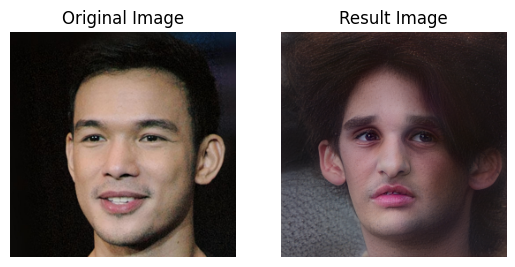

In [73]:
%matplotlib inline
result_images = model(original_images.cuda())
visualize(original_images.cpu(), result_images.cpu())

## 2. Laplace Mechanism

In [74]:
from DP_methods_utils.LaplaceMechanism import LaplaceMechanismModel

model = LaplaceMechanismModel()
model = model.cuda()

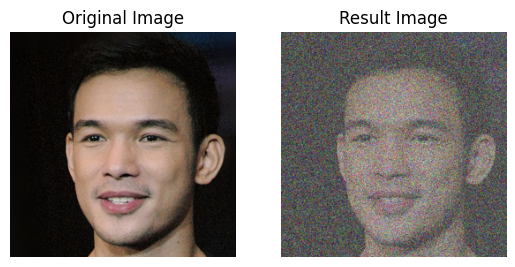

In [75]:
%matplotlib inline
result_images = model(original_images.cuda())
visualize(original_images.cpu(), result_images.cpu())

## 3. DPPix

In [76]:
from DP_methods_utils.DPPix import DPPixModel

model = DPPixModel()
model = model.cuda()

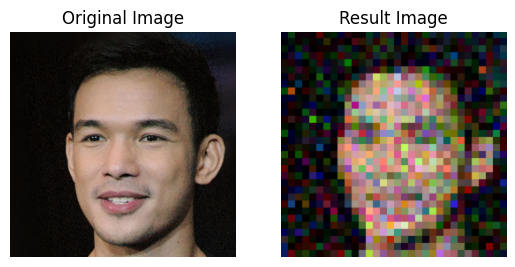

In [77]:
%matplotlib inline
result_images = model(original_images.cuda())
visualize(original_images.cpu(), result_images.cpu())

## 4. Snow

In [78]:
from DP_methods_utils.Snow import SnowModel

model = SnowModel()
model = model.cuda()

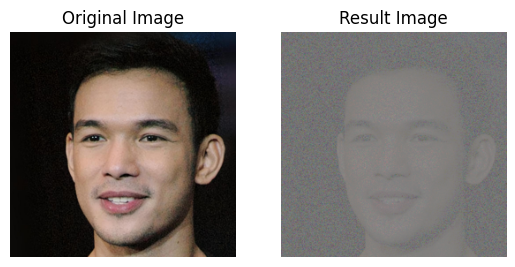

In [79]:
%matplotlib inline
result_images = model(original_images.cuda())
visualize(original_images.cpu(), result_images.cpu())